In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_excel('Online Retail.xlsx')

In [49]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [50]:
df.shape

(541909, 8)

In [51]:
#Gives the total count of each country

#df.Country.value_counts()

In [52]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

# understanding/finding out each customers rec , freq and monetary values

In [53]:
#recency

day = '2012-01-01'
day = pd.to_datetime(day)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

recency = df.groupby(['CustomerID']).agg({"InvoiceDate": lambda x:((day - x.max()).days)})
# the .agg() is applied on the invoice date column, x.max() is the highest value in that column,
#subtraction gives the diff ebtween the current date and highest value, .days() converts it into day




In [54]:
# gives the number of days since the last order

recency.head()

,InvoiceDate
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332


In [55]:
# frequency 

freq = df.drop_duplicates(subset = 'InvoiceNo').groupby(['CustomerID'])[['InvoiceNo']].count()

In [56]:
# tells us the number of times a particular customer has taken the service 

freq.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [57]:
# monetory value 

In [58]:
df['total']= df['UnitPrice'] * df['Quantity']

In [59]:
money = df.groupby(['CustomerID'])[["total"]].sum()

In [60]:
money.head()


,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [61]:
df['total'].max()

168469.6

In [62]:
customer_details = df[df['CustomerID'] == 12346.0]


In [63]:
customer_details

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [71]:
''' combine the 3 columns together and rename them, it gives us each customers 
recency, frequency and amount spent by them '''

RFM = pd.concat([recency, freq, money],axis=1)
recency.columns = ['Recency']
freq.columns = ['Frequency']
money.columns = ['Money']


In [72]:
RFM.head()

,Recency,Frequency,Money
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40


In [73]:
''' Standardising the data to get a common unit '''

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)

In [74]:
# inertia gives the squares of the distances between the centroid and the data points.

from sklearn.cluster import KMeans

inertia = []

for i in np.arange(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_) 

print(inertia)
#plt.plot(inertia,marker='o')
#plot.show()

C:\Users\sanku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

[13116.000000000002, 9204.014314100903, 5527.715515899208, 4046.6395856924664, 3020.2733516539765, 2383.630044136904, 1906.3041416298022, 1585.5649930710322, 1348.015061918545, 1232.2441496828792]


In [75]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM['clusters'] = (kmeans.labels_ +1)

C:\Users\sanku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [76]:

    RFM

,Recency,Frequency,Money,clusters
CustomerID,,,,
12346.0,347,2,0.00,3
12347.0,24,7,4310.00,1
12348.0,97,4,1797.24,1
12349.0,40,1,1757.55,1
12350.0,332,1,334.40,3
...,...,...,...,...
18280.0,299,1,180.60,3
18281.0,202,1,80.82,3
18282.0,29,3,176.60,1


In [77]:
final = RFM.groupby('clusters')['Recency', 'Frequency', 'Money'].mean()
final

C:\Users\sanku\AppData\Local\Temp\ipykernel_18780\1789106243.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final = RFM.groupby('clusters')['Recency', 'Frequency', 'Money'].mean()


,Recency,Frequency,Money
clusters,,,
1,61.593084,5.548626,1795.309282
2,27.346154,83.346154,75966.387308
3,267.719964,1.852755,460.644066


# This means that cluster 1 has receny of 267, frequency of 1.8 and monetary value of 460.3 on average
 

In [87]:
def func(row):
    if row['clusters'] == 1:
        return 'Avg Cx'
    elif row['clusters'] == 3:
        return 'Lapsed Cx'
    else :
        return 'Whales Cx'

In [88]:
RFM['group'] = RFM.apply(func,axis = 1)

In [89]:
RFM

,Recency,Frequency,Money,clusters,group
CustomerID,,,,,
12346.0,347,2,0.00,3,Lapsed Cx
12347.0,24,7,4310.00,1,Avg Cx
12348.0,97,4,1797.24,1,Avg Cx
12349.0,40,1,1757.55,1,Avg Cx
12350.0,332,1,334.40,3,Lapsed Cx
...,...,...,...,...,...
18280.0,299,1,180.60,3,Lapsed Cx
18281.0,202,1,80.82,3,Lapsed Cx
18282.0,29,3,176.60,1,Avg Cx


In [93]:
result = RFM['group'].value_counts()



In [94]:
result

Avg Cx       3239
Lapsed Cx    1107
Whales Cx      26
Name: group, dtype: int64

<AxesSubplot:>

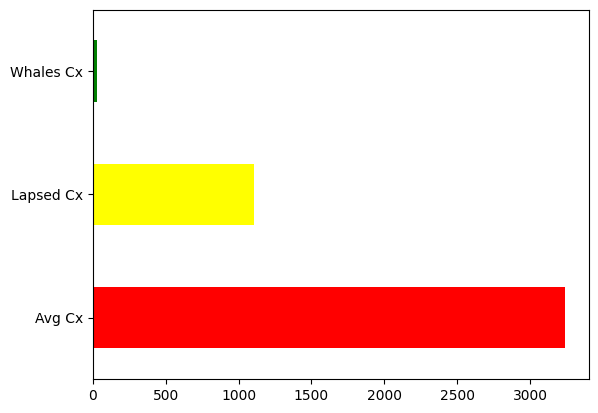

In [95]:
result.plot(kind = 'barh', color = ['red','yellow','green'])